# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sea
%matplotlib inline

In [2]:
train=pd.read_csv("tested.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis by checking out missing data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

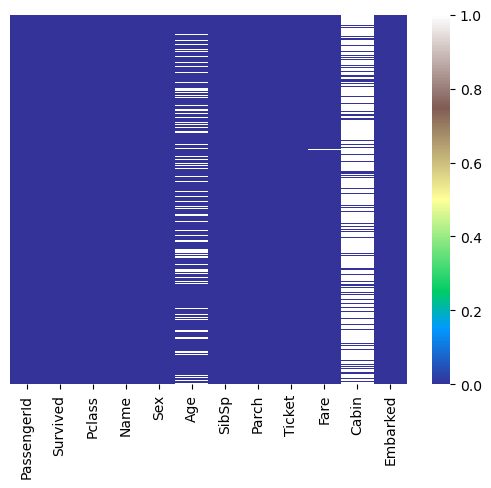

In [5]:
sea.heatmap(train.isnull(),yticklabels=False,cmap="terrain")

<Axes: xlabel='Survived', ylabel='count'>

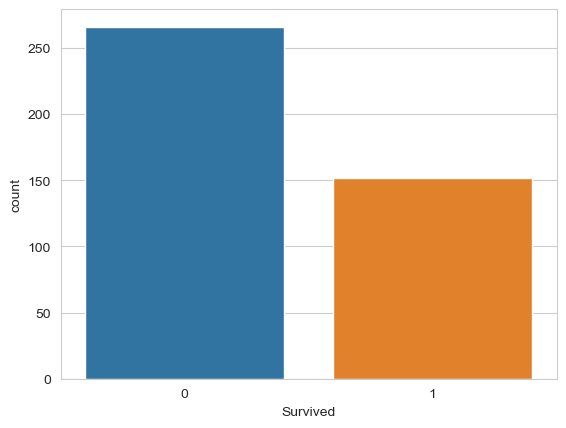

In [6]:
sea.set_style("whitegrid")
sea.countplot(x="Survived",data=train)


<Axes: xlabel='Survived', ylabel='count'>

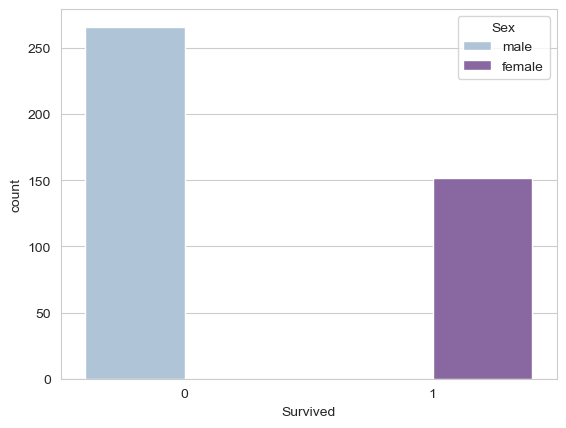

In [7]:
sea.set_style("whitegrid")
sea.countplot(x="Survived",hue="Sex",data=train,palette="BuPu")

<Axes: xlabel='Survived', ylabel='count'>

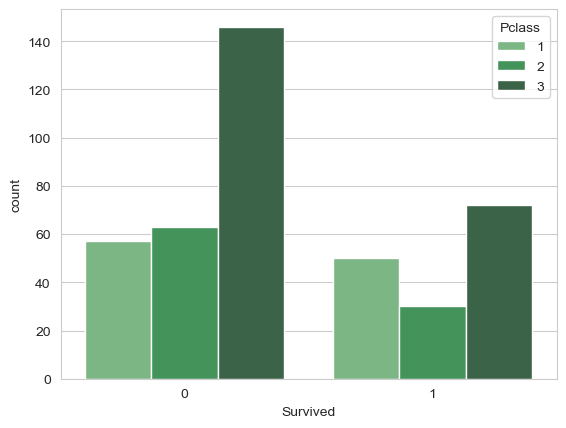

In [8]:
sea.set_style("whitegrid")
sea.countplot(x="Survived",hue="Pclass",data=train,palette="Greens_d")

C:\Users\user\AppData\Local\Temp\ipykernel_9276\3260734205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(train["Age"].dropna(),kde=False,color="darkgreen",bins=30)


<Axes: xlabel='Age'>

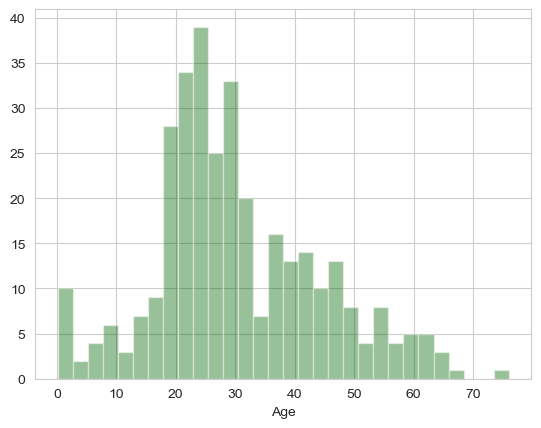

In [9]:
sea.distplot(train["Age"].dropna(),kde=False,color="darkgreen",bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

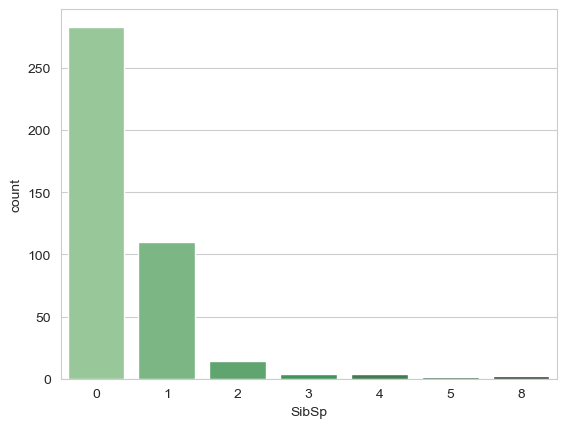

In [10]:
sea.countplot(x="SibSp",data=train,palette="Greens_d")

<Axes: >

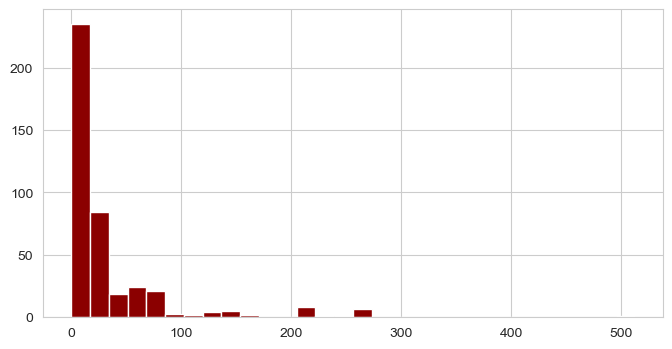

In [11]:
train["Fare"].hist(color="darkred",bins=30,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

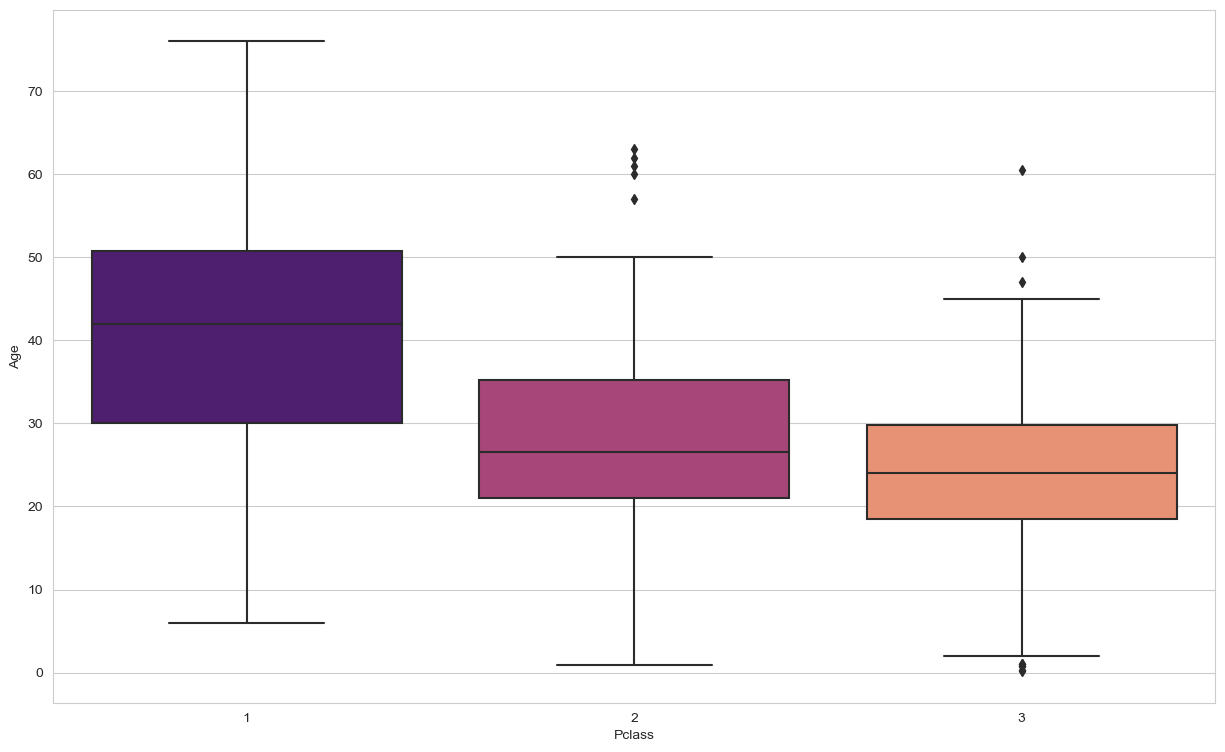

In [12]:
pt.figure(figsize=(15,9))
sea.boxplot(x="Pclass",y="Age",data=train,palette="magma")

In [13]:
def remove_null_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [14]:
train["Age"]=train[["Age","Pclass"]].apply(remove_null_age,axis=1)

<Axes: >

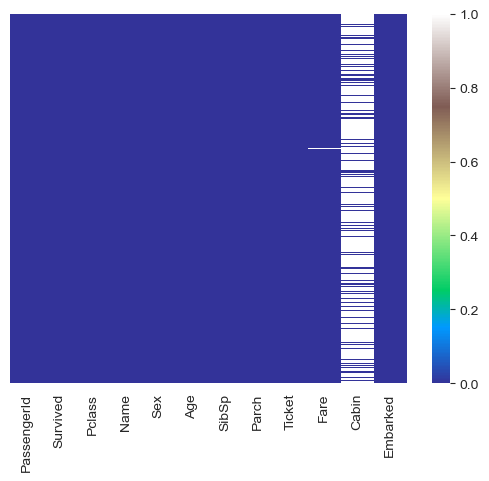

In [15]:
sea.heatmap(train.isnull(),yticklabels=False,cmap="terrain")

In [16]:
train.drop("Cabin",axis=1,inplace=True)

<Axes: >

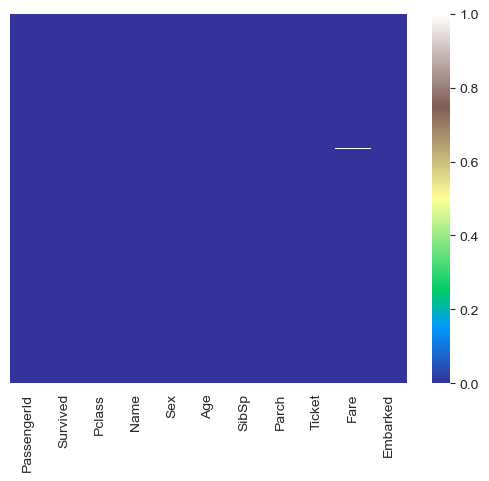

In [18]:
sea.heatmap(train.isnull(),yticklabels=False,cmap="terrain")

In [19]:
def remove_null_Fare(cols):
    Fare=cols[0]
    
    if pd.isnull(Fare):
        return 1000
    else:
        return Fare
    

In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
train=train.dropna()

In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

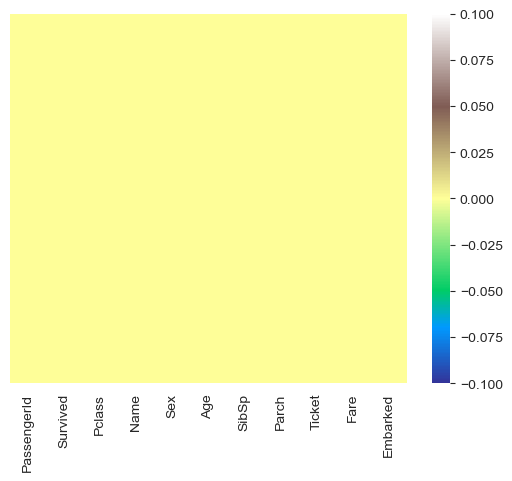

In [21]:
sea.heatmap(train.isnull(),yticklabels=False,cmap="terrain")
    

In [22]:
pd.get_dummies(train["Embarked"],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [23]:
sex=pd.get_dummies(train["Sex"],drop_first=True)


In [24]:
Embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [25]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [34]:
train=pd.concat([train,sex,Embark],axis=1)

# Logistic Regression Model(Building)

In [35]:
train.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [27]:
train["Survived"].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.3,random_state=100)

# Training And Prediction

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
lmodel=LogisticRegression(random_state=0)
lmodel.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [35]:
predictions=lmodel.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [42]:
precision=confusion_matrix(y_test,predictions)

In [40]:
precision

array([[72,  9],
       [42,  3]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
precision=accuracy_score(y_test,predictions)

In [44]:
precision

0.5952380952380952

In [45]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)